####  <span style='color:Blue'> Dane do analizy </span>:  MNIST.csv (Modified National Institute of Standards and Technology database)
####  <span style='color:Blue'> Cel badania </span>:  Rozpoznanie i klasyfikacji znaków ręcznie napisanych . 

####   <span style='color:Blue'> Klasyfikator </span>:  Decision tree, RF, ExtraTree, XGBoost (Improved GradientBoosting)

##### <span style='color:Blue'>  Zadanie 1 </span>: Ładowanie zbioru treningowego i testowego i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii. 
##### <span style='color:Blue'>  Zadanie 2 </span>:   Wizualizacja 8 pierwszych liter w zbiorze uczącym i 8 pierwszych w zbiorze testowym.
__Wskazówka__: Przekształcić wektor 784-bitowy (wiersz) na macierz o wymiarach <span style='color:red'> $ 28 \times 28$ (reshape()) </span>. 
##### <span style='color:Blue'>  Zadanie 3 </span>:  Tworzenie klasyfikatora <i>Decision tree</i>.
__Wskazówka__: <span style='color:red'>  from sklearn.tree import DecisionTreeClassifier </span>

##### <span style='color:Blue'>  Zadanie 4 </span>:  Optymalizacja hyperparametrów DT.
__Wskazówka: Zmienić parametry__
* Głębokość drzewa (max_depth)
* Kryterium podziału (criterion = 'gini', 'entropy')
* Miara oceny: accuracy
<b>Wniosek</b>: Które parametry są optymalne?
##### <span style='color:Blue'>  Zadanie 5 </span> : Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów DT.

* Głębokość drzewa (max_depth = 10, 20, 30)
* Kryterium podziału (criterion = 'gini', 'entropy', 'log_loss')
* Miara oceny: accuracy.
<b>Wniosek</b>: Które parametry są optymane?

##### <span style='color:Blue'>  Zadanie 6 </span> : Trenować zespół klasyfikatorów <i> RandomForest </i>  z optymalizacją parametrów.
__Wskazówka__: <span style='color:red'>  from sklearn.ensemble import RandomForestClassifier </span>

##### <span style='color:Blue'>  Zadanie 7 </span> : Trenować zespół klasyfikatorów <i> ExtraTree </i>  z optymalizacją parametrów.
__Wskazówka__: <span style='color:red'>  from sklearn.ensemble import ExtraTreeClassifier </span>

##### <span style='color:Blue'>  Zadanie 8 </span>:  Trenować zespół klasyfikatorów <i> XGBoost </i>  z optymalizacją parametrów.
__Wskazówka__: 
<span style='color:red'>  !pip install  xgboost </span> 

<span style='color:red'>  import xgboost as xgb  </span>

#####  <span style='color:Blue'>  Zadanie 9 </span>: Wyznaczyć czas działania  DT, RF, ExtraTree, XGBoost
__Wskazówka__:  

#####  <span style='color:Blue'>  Zadanie 10 </span>: Napisać podsumowanie:
1. Który klasyfikator jest najlepszy?
2. Jakie są hiperparametry?
3. Porównywać czas obliczenia algorytmów RF, ExtraTree i XGBoost. Który algorytm jest najszybszy? 

In [17]:
# Importowanie danych z lokalnego dysku

import pandas as pd

path = "Datasets/"
column_names = [0 for i in range(785)]
column_names[0] = "class"

for i in range(1, 785):
    column_names[i] = "pixel" + str(i)
df_train = pd.read_csv(path + "mnist_train.csv", header=None, names=column_names)
df_test = pd.read_csv(path + "mnist_test.csv", header=None, names=column_names)

# print (column_names)
print(df_train.shape)
df_train.head(10)

(60000, 785)


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Wyświetlić informację o danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
# Rozkład kategorii.

<class 'pandas.core.series.Series'>
class
0    0.098717
1    0.112367
2    0.099300
3    0.102183
4    0.097367
5    0.090350
6    0.098633
7    0.104417
8    0.097517
9    0.099150
dtype: float64


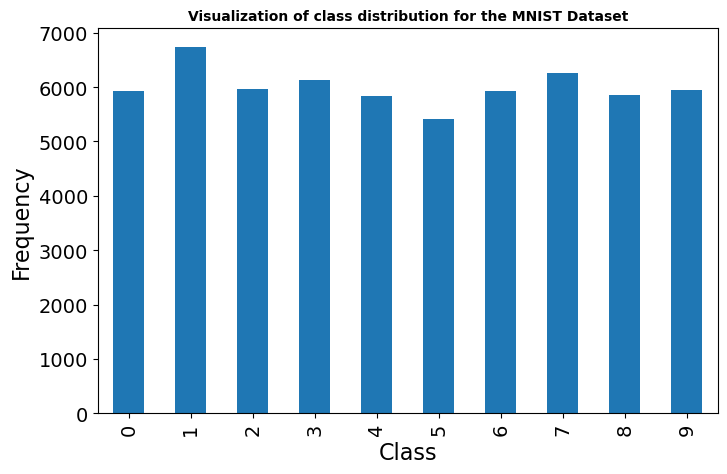

In [4]:
# Rozkładu kategorii, wykres słupkowy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnining

warnings.filterwarnings("ignore")

In [6]:
# Podział danych:  zbiór treningowy i testowy
# from sklearn.model_selection import train_test_split

# train,test = train_test_split (df, test_size=0.3, random_state=50, shuffle = True)

# Tworzyć atrybut docelowy.

X_train = df_train.iloc[:, 1:785]
y_train = df_train.iloc[:, 0]
X_test = df_test.iloc[:, 1:785]
y_test = df_test.iloc[:, 0]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


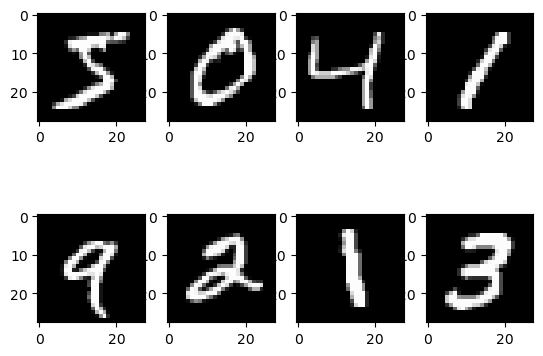

In [7]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(8):
    # define subplot
    plt.subplot(240 + 1 + i)
    # plot raw pixel data
    ith_image = X_train.iloc[i, :]
    ith_image_arr = ith_image.to_numpy()
    ith_image = ith_image_arr.reshape(28, 28)
    plt.imshow(ith_image, cmap=plt.get_cmap("gray"))
# show the figure
plt.show()

In [8]:
# Klasyfikator DT
# Ewaluacja modelu: accuracy-score,

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy: 0.8665
[[ 918    0    8    8    6   12    9    4   13    2]
 [   1 1087   12   15    2    5    3    1    9    0]
 [  12   11  865   19   20   12   10   35   38   10]
 [   7    5   37  846    6   49    4   19   20   17]
 [   4    4    7    7  832    8   12    9   28   71]
 [  15    9    5   52   13  717   19    8   30   24]
 [  25    5   14    6   31   17  834    3   21    2]
 [   2   14   25   10   10    6    0  906   11   44]
 [  10    9   29   38   13   25   18    9  793   30]
 [  13    3    5   31   24   14    4   13   35  867]]


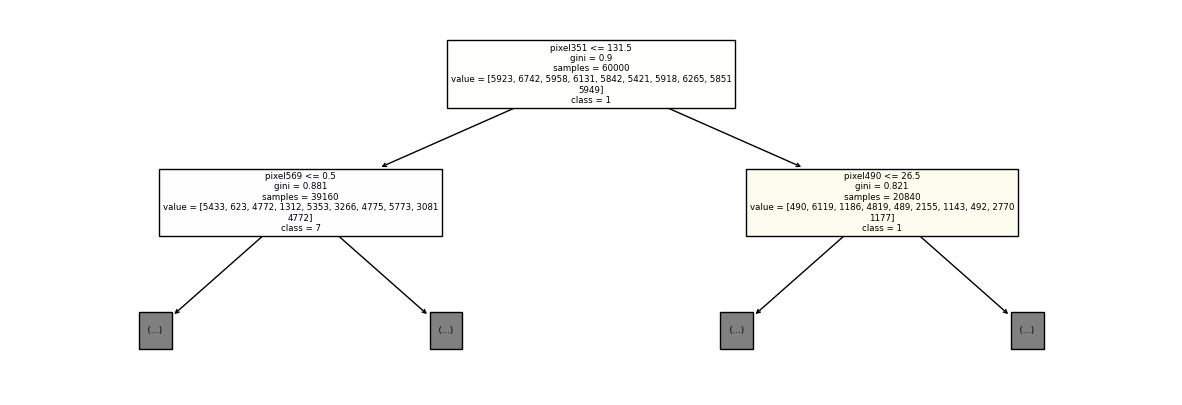

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
t_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
tree.plot_tree(
    tree_clf, max_depth=1, feature_names=f_names, class_names=t_names, filled=True
)
plt.show()

In [10]:
# DT - Text form
from sklearn.tree import export_text

f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
r = export_text(tree_clf, feature_names=f_names, max_depth=3)
print(r)

|--- pixel351 <= 131.50
|   |--- pixel569 <= 0.50
|   |   |--- pixel431 <= 0.50
|   |   |   |--- pixel406 <= 2.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel406 >  2.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- pixel431 >  0.50
|   |   |   |--- pixel212 <= 28.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel212 >  28.50
|   |   |   |   |--- truncated branch of depth 7
|   |--- pixel569 >  0.50
|   |   |--- pixel436 <= 0.50
|   |   |   |--- pixel490 <= 22.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel490 >  22.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- pixel436 >  0.50
|   |   |   |--- pixel347 <= 0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel347 >  0.50
|   |   |   |   |--- truncated branch of depth 7
|--- pixel351 >  131.50
|   |--- pixel490 <= 26.50
|   |   |--- pixel291 <= 34.50
|   |   |   |--- pixel487 <= 58.50
|   |   |   |   |--

In [9]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")

0.9498
[[ 966    0    3    2    2    3    3    1    0    0]
 [   0 1124    2    3    0    0    2    0    4    0]
 [   7    2  987    5    3    3    4   13    7    1]
 [   1    0   20  946    0   16    1   12   12    2]
 [   1    1    6    2  946    0    5    0    4   17]
 [   6    2    4   36    2  821    6    2    8    5]
 [  11    3    3    3    8    7  920    0    3    0]
 [   2    6   22    2    5    1    0  971    4   15]
 [   8    1   16   11   14   14    5    4  894    7]
 [   8    4    3   15   31    6    1    9    9  923]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.93      0.96      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.92      0.93       892
           6       0.97      0.96      0.97       958
           7       0.96      

In [14]:
# ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
import warnings

warnings.filterwarnings("ignore")

0.952
[[ 970    0    1    0    0    1    5    1    2    0]
 [   0 1125    3    3    0    1    1    0    2    0]
 [   5    0  983    6    2    4    5   14   12    1]
 [   2    1   12  953    0   19    1    5    9    8]
 [   5    0    2    2  941    1    4    2    3   22]
 [   7    2    4   34    4  821    9    1    5    5]
 [  14    2    4    2    8    6  920    0    2    0]
 [   2    3   22    6    5    1    0  977    1   11]
 [   8    0   11   18   13   12    6    5  892    9]
 [   5    5    3   12   22    6    1    9    8  938]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.95      0.95      1032
           3       0.92      0.94      0.93      1010
           4       0.95      0.96      0.95       982
           5       0.94      0.92      0.93       892
           6       0.97      0.96      0.96       958
           7       0.96      0

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=30, criterion="gini")
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print('F1 measure:', f1_score (y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8799
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.88      0.86      0.87      1032
           3       0.84      0.85      0.85      1010
           4       0.87      0.88      0.87       982
           5       0.83      0.85      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.84      0.81      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [23]:
# Klasyfikator XGBoost
#!pip install  xgboost
import xgboost as xgb

Accuracy: 0.9363
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.93      0.92      0.93       982
           5       0.92      0.91      0.91       892
           6       0.95      0.97      0.96       958
           7       0.95      0.94      0.94      1028
           8       0.90      0.90      0.90       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [12]:
# klasyfikator XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=20, criterion="gini")

Accuracy: 0.9592
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.96      0.95      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.92      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

